# Question 1

In [1]:
#STEP 1
#import dependencies
import pandas as pd
import numpy as np

In [2]:
#STEP 2 & 3
#read csv from url
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep ='|')
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [3]:
#STEP 4
age_mean = users.groupby("occupation").age.mean()
age_mean

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [4]:
#step 5

#all gender by their occupation
gender_all = users.groupby("occupation")["gender"].value_counts(normalize=True)*100
gender_all.head()



occupation     gender
administrator  M          54.430380
               F          45.569620
artist         M          53.571429
               F          46.428571
doctor         M         100.000000
Name: gender, dtype: float64

In [5]:
#Convert to dataframe and rename columns
df_gender = pd.DataFrame(gender_all)
df_gender.rename(columns={"gender":"percent"}, inplace=True)
df_gender.head()

percent
occupation    gender            
administrator M        54.430380
              F        45.569620
artist        M        53.571429
              F        46.428571
doctor        M       100.000000

In [6]:
#Add index
Percent_genders = pd.DataFrame(df_gender.reset_index(level=["occupation", "gender"]))
Percent_genders.head()

,occupation,gender,percent
0,administrator,M,54.430380
1,administrator,F,45.569620
2,artist,M,53.571429
3,artist,F,46.428571
4,doctor,M,100.000000


In [7]:
male_ratio = Percent_genders[Percent_genders["gender"] == "M"].sort_values(by="percent",ascending=False)
male_ratio

,occupation,gender,percent
4,doctor,M,100.000000
7,engineer,M,97.014925
37,technician,M,96.296296
29,retired,M,92.857143
27,programmer,M,90.909091
11,executive,M,90.625000
33,scientist,M,90.322581
9,entertainment,M,88.888889
17,lawyer,M,83.333333
31,salesman,M,75.000000


In [8]:
#STEP 6
#min and max for each occupation
users.groupby("occupation").age.agg([min, max])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [9]:
#STEP 7
#Mean age for each combination of occupation and sex
users.groupby(['occupation','gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [10]:
#Step 8
# percentage of women and men for each occupation

Percent_genders

,occupation,gender,percent
0,administrator,M,54.430380
1,administrator,F,45.569620
2,artist,M,53.571429
3,artist,F,46.428571
4,doctor,M,100.000000
5,educator,M,72.631579
6,educator,F,27.368421
7,engineer,M,97.014925
8,engineer,F,2.985075
9,entertainment,M,88.888889


## QUESTION 2

In [11]:
#STEP 1
#import dependencies
import pandas as pd
import numpy as np

In [12]:
#STEP 2 & 3
#Import the dataset from from url
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [13]:
#Step 4. 
#Select only the Goal column
euro12['Goals']


0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [14]:
#Step 5. 
# Euro2012team participant
team_participant = euro12.shape[0]
print("Number of Euro2012team participant:", team_participant)

Number of Euro2012team participant: 16


In [15]:
#Step 6.
#number of columns in the dataset
nos_columns = euro12.shape[1]
print("Number of columns:", nos_columns)

Number of columns: 35


In [16]:
#STEP 7 
#view only columns Team, Yellow Cards and Red Cards and assign them a df

df_discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
df_discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [17]:
#STEP 8
#Sorting the teams by Red Cards, then to Yellow Cards
df_discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending = False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [18]:
#STEP 8
#mean of Yellow Cards given per Team

mean_yellowcards_perteam = df_discipline.groupby('Team')['Yellow Cards'].mean().round()

print(mean_yellowcards_perteam)

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64


In [19]:
#STEP 10
#. Filter teams that scored more than 6 goals
euro12[euro12.Goals > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [20]:
#STEP 11
#teams that start with G
Starting_withG = euro12[euro12.Team.str.startswith('G')]
Starting_withG

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [21]:
#STEP 12
#Select the first 7 columns
first_7columns = euro12.iloc[:,0:7]

(first_7columns)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [22]:
#STEP 13
# Selecting all columns except the last 3
Columns_except3= euro12[euro12.columns[0:-3]]
Columns_except3

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [23]:
#STEP 14
#Shooting Accuracy from England, Italy and Russia
EIR_accuracy = euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]
EIR_accuracy

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


## QUESTION 3

In [24]:
#STEP 1
# import dependencies
import pandas as pd
import numpy as np

In [25]:
#STEP 2
#Create 3 differents Series, each of length 100,The first a random number from 1 to 4
first_series = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
first_series

0     4
1     2
2     3
3     4
4     1
     ..
95    2
96    3
97    1
98    4
99    1
Length: 100, dtype: int32

In [26]:
#The second a random number from 1 to 3
second_series = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
second_series

0     2
1     3
2     3
3     3
4     1
     ..
95    3
96    2
97    1
98    1
99    2
Length: 100, dtype: int32

In [27]:
#The third a random number from 10,000 to 30,000
Third_series = pd.Series(np.random.randint(10000, high=300001, size=100, dtype='l'))
Third_series 

0      58226
1     148255
2      98383
3     289435
4     176302
       ...  
95    107572
96     44195
97    257100
98    229177
99     35477
Length: 100, dtype: int32

In [28]:
#STEP 3
#Create a DataFrame by joinning the Series by column

df_allseries = pd.concat([first_series, second_series, Third_series], axis=1)
df_allseries.tail()

,0,1,2
95,2,3,107572
96,3,2,44195
97,1,1,257100
98,4,1,229177
99,1,2,35477


In [29]:
#STEP 4
#Change the name of the columns to bedrs, bathrs, price_sqr_meter
df_allseries.rename(columns = {0:'bedrs', 
                               1:'bathrs' ,
                               2:'price_sqr_meter'}, inplace =True) 
df_allseries.head()

,bedrs,bathrs,price_sqr_meter
0,4,2,58226
1,2,3,148255
2,3,3,98383
3,4,3,289435
4,1,1,176302


In [30]:
#STEP 5
#Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

# Concatenate all Series 
bigcolumn = pd.concat([first_series, second_series, Third_series], axis=0)

# Create a DataFrame with the concatenated Series as a single column
df = pd.DataFrame(bigcolumn, columns=['bigcolumn'])

print(df)

    bigcolumn
0           4
1           2
2           3
3           4
4           1
..        ...
95     107572
96      44195
97     257100
98     229177
99      35477

[300 rows x 1 columns]


In [31]:
#STEP 6
#Ops it seems it is going only until index 99. Is it true?

bigcolumn.count()

300

In [32]:
#STEP 7
#Step Reindex the DataFrame so it goes from 0 to 299
df.reset_index(drop=True, inplace=True)
df

,bigcolumn
0,4
1,2
2,3
3,4
4,1
...,...
295,107572
296,44195
297,257100
298,229177


## QUESTION 4

In [33]:
#Step 1. 
#Import the necessary libraries
import pandas as pd
from datetime import datetime


In [34]:
#Step 2 and 3. Import the dataset from the file wind.txt
# and replace the first 3 columns by a proper datetime index.
path_data= 'wind.txt'

data = pd.read_csv(path_data, sep = "\s+", parse_dates = [[0,1,2]]) 
data


,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [35]:
#data = pd.read_csv(path_data, sep="\s+", parse_dates=[[0, 1, 2]], index_col=1)  # Assuming 'Yr_Mo_Dy' is the datetime column


In [36]:

# Assume 'data' is your DataFrame with the datetime column named 'datetime'

# function that fixes the century of dates
def fix_century(x):
    year = x.year - 100 if x.year > 1989 else x.year
    return datetime(year, x.month, x.day)

# apply the function fix_century on the column and replace the values
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix_century)

# Display the DataFrame
data.head()


,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [37]:
#Step 5
# Convert the index to datetime64[ns] data type
data['Yr_Mo_Dy'] = pd.to_datetime(data['Yr_Mo_Dy'])
data = data.set_index('Yr_Mo_Dy')
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [38]:
#step 6
#how many values are missing for each location over the entire record.They should be ignored in all calculations below.
# Count missing values for each location
missing_values_per_location = data.isnull().sum()

print(missing_values_per_location)


RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


In [39]:
#step 7
#Compute how many non-missing values there are in total.
total_non_missing_values = data.notnull().sum()
total_non_missing_values 


RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [40]:
#step 8
#Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
mean_windspeed = data.mean().mean()

print("Mean windspeed:", mean_windspeed)

Mean windspeed: 10.227982360836938


In [41]:
#step 9
#Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days

loc_stats = data.agg(['min', 'max', 'mean', 'std'])

# Transpose the DataFrame to have locations as rows
loc_stats = loc_stats.T

# Rename the columns for clarity
#loc_stats.columns = ['Min', 'Max', 'Mean', 'Std']

loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [42]:
# create the dataframe
day_stats = pd.DataFrame()

# this time we determine axis equals to one so it gets each row.
day_stats['min'] = data.min(axis = 1) # min
day_stats['max'] = data.max(axis = 1) # max 
day_stats['mean'] = data.mean(axis = 1) # mean
day_stats['std'] = data.std(axis = 1) # standard deviations

day_stats.head()

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [43]:
# # Drop rows with missing values (NaNs)
# data.dropna(inplace=True)

# # Calculate the minimum, maximum, mean, and standard deviation of the windspeeds across all locations at each day

day_stats = data.agg(['min', 'max', 'mean', 'std'])



day_stats.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


In [44]:
#step 10
#Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
# Drop rows with missing values (NaNs)
data.dropna(inplace=True)

day_stats = data.agg(['min', 'max', 'mean', 'std'], axis=1)

day_stats


,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
1961-01-06,4.42,13.21,8.240000,2.998063
1961-01-07,4.96,14.29,10.385000,3.072114
1961-01-08,5.91,16.62,10.487500,3.547237
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [45]:
#step 11
#find the average windspeed in January 1961 and January 1962  for each location.

# Filter the data for January dates
january_data = data[data.index.month == 1]

# Group by location and calculate the mean windspeed for January
average_windspeed_january = january_data.mean()


average_windspeed_january



RPT    14.831609
VAL    12.885389
ROS    13.276275
KIL     7.152477
SHA    11.644467
BIR     8.030561
DUB    11.788336
CLA     9.486962
MUL     9.511501
CLO    10.024069
BEL    14.527848
MAL    18.041826
dtype: float64

In [46]:
#step 12
# Downsample to yearly frequency for each location

yearly_data = data.groupby(data.index.to_period('Y')).mean()
yearly_data 

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.207588,10.207206,11.282853,6.846441,10.742735,7.617147,9.633265,8.684912,8.571941,9.700471,13.271559,13.587206
1962,12.274779,10.150856,11.714365,6.964337,10.692265,7.415331,11.043122,8.829807,8.335552,9.693812,12.985691,14.361436
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [47]:
#step 13
#Downsample the record to a monthly frequency for each location.
monthly_data= data.groupby(data.index.to_period('M')).mean()
monthly_data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.506154,11.225385,12.960385,6.840000,10.509231,8.174231,10.403077,8.670769,8.323462,9.490385,13.270000,14.341538
1961-02,16.401923,15.037308,14.470000,9.242692,13.778077,10.884615,11.868077,11.746154,11.748462,12.626538,18.165000,15.300769
1961-03,10.660000,11.097407,10.420000,7.100741,10.265556,8.580000,9.108519,9.329259,10.100000,10.989630,16.066296,15.418889
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,10.024643,8.495714,10.539286,5.992500,9.480357,6.633929,7.645714,8.206786,8.120714,8.534643,11.912143,11.911786
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [48]:
#step 14
#Downsample the record to a weekly frequency for each location.
weekly_data= data.groupby(data.index.to_period('W')).mean()
weekly_data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-02/1961-01-08,12.316000,10.408000,10.050000,5.658000,8.506000,6.242000,10.936000,5.932000,8.150000,8.428000,11.416000,13.226000
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,12.100000,9.500000,11.681667,4.293333,8.966667,6.938333,7.828333,7.291667,5.891667,6.693333,9.993333,10.346667
1961-01-23/1961-01-29,19.880000,14.846667,17.548333,11.916667,16.325000,14.016667,14.450000,14.311667,13.316667,14.921667,19.800000,22.388333
1961-01-30/1961-02-05,16.827143,15.460000,12.618571,8.247143,13.361429,9.107143,12.204286,8.548571,9.821429,9.460000,14.012857,11.935714
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [49]:
#step 15
#Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks

 #Calculate stats for each week
weekly = data.resample('W').agg(['min','max','mean','std'])

#  slice first 52 weeks
weekly.loc[weekly.index[1:53], "RPT":"MAL"] .head(10)

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  17.75  12.100000  4.893064   3.42  14.37   9.500000   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  20.79  14.846667   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  14.956667  5.525210  11.63  20.17  15.008333   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  11.824000  1.071742   8.83  17.00  12.956000   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.195000   
1961-03-19   4.92  16.88  11.911429  3.860036   9.46  15.54  13.501429   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Yr_Mo_Dy                            ...                                      
1961-01-15  3.148945   7.08  19.50  ...   7.571429  4.084293   5.25  20.71   
1961-01-22  4.070420   7.29  17.33  ...   6.693333  3.203652   6.50  15.92   
1961-01-29  4.242125  12.67  25.84  ...  14.921667  3.494638  14.04  26.08   
1961-02-05  5.187395   9.04  19.70  ...   9.460000  2.839501   9.17  19.33   
1961-02-12  3.608373  13.67  21.34  ...  14.440000  1.746749  15.21  26.38   
1961-02-19  3.908818   6.13  19.41  ...  13.521667  2.772287  14.09  28.62   
1961-02-26  5.147348   6.08  22.42  ...  12.730000  4.920064   9.59  23.21   
1961-03-05  3.490319   8.17  13.67  ...  12.068000  1.729775  11.58  23.45   
1961-03-12  3.359302   7.54  15.50  ...   9.570000  3.065864  10.21  22.71   
1961-03-19  2.352867   5.25  13.96  ...  11.627143  3.099472  11.29  22.79   

                                   MAL                              
                 mean       std    min    max       mean       std  
Yr_Mo_Dy                                                            
1961-01-15  11.125714  5.552215   5.17  16.92  11.024286  4.692355  
1961-01-22   9.993333  3.941358   6.79  16.08  10.346667  3.407132  
1961-01-29  19.800000  4.675044  17.50  27.63  22.388333  4.224639  
1961-02-05  14.012857  4.210858   7.17  19.25  11.935714  4.336104  
1961-02-12  21.832857  4.063753  17.04  21.84  19.155714  1.828705  
1961-02-19  19.756667  5.021524  10.96  22.58  15.925000  4.763632  
1961-02-26  16.304286  5.091162   6.67  23.87  14.322857  6.182283  
1961-03-05  17.174000  5.058249   8.83  17.54  14.108000  3.350772  
1961-03-12  16.068333  4.408144   5.54  18.16  13.066667  4.956336  
1961-03-19  19.350000  3.779727  11.34  22.95  16.227143  4.331958  

[10 rows x 48 columns]

## QUESTION 5 

In [50]:
#STEP 1
#import dependencies
import pandas as pd
import numpy as np

In [51]:
#STEP 2 and 3
#import url and ssigned chipo as the variable

# URL of the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

# Read the dataset into a DataFrame
chipo_data = pd.read_csv(url, sep='\t')


In [52]:
#STEP 4
# Display the first 10 rows of the DataFrame
chipo_data.head(10)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [53]:
#STEP 5
#name of the observation in the dataset
# Number of observations (rows) in the dataset
nos_observations = chipo_data.shape[0]

print("Number of observations:", nos_observations)



Number of observations: 4622


In [54]:
#STEP 6 
#nos of colums in the dataset

nos_columns = chipo_data.shape[1]

print("Number of columns:", nos_columns)


Number of columns: 5


In [55]:
#STEP 7
#printing out the columns to reduce it
print(chipo_data.columns)


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [56]:
#STEP 8
#How is the dataset indexed?
dataset_index=chipo_data.index
dataset_index

RangeIndex(start=0, stop=4622, step=1)

In [57]:
#STEP 9
#  the most-ordered item?

# Group the data by item name and sum the quantity ordered for each item
item_quantity = chipo_data.groupby('item_name')['quantity'].sum()

# Find the item with the highest total quantity ordered
mostordered_item = item_quantity.idxmax()

print("Mostordered item:", mostordered_item)

Mostordered item: Chicken Bowl


In [58]:
#STEP 10
#Find the quantity ordered for the most-ordered item

quantity_ordered = item_quantity.max()

# print("Most-ordered item:", most_ordered_item)
print("Quantity ordered:", quantity_ordered)

Quantity ordered: 761


In [59]:
    #STEP 11
#the most ordered item in the choice_description column
# Group the data by choice_description and sum the quantity ordered for each description
choice_quantity = chipo_data.groupby('choice_description')['quantity'].sum()

# Find the choice description with the highest total quantity ordered
mostordered_choice = choice_quantity.idxmax()

print("Mostordered item in the choice_description column:", mostordered_choice)


Mostordered item in the choice_description column: [Diet Coke]


In [60]:
#STEP 12
#How many items were orderd in total?

totalitems_ordered = chipo_data['quantity'].sum()

print("Total number of items ordered:", totalitems_ordered)


Total number of items ordered: 4972


In [61]:
#Step 13:a
#Turn the item price into a float
# Remove the dollar sign ($) from each item price and convert to float

chipo_data['item_price'] = chipo_data['item_price'].astype(str)

chipo_data['item_price'] = chipo_data['item_price'].str.replace('$', '').astype(float)


C:\Users\olaka\AppData\Local\Temp\ipykernel_3120\2799259260.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipo_data['item_price'] = chipo_data['item_price'].str.replace('$', '').astype(float)


In [62]:
#Step 13:b
# : Check the type of the item price column again
print("Type of item_price after conversion:", chipo_data['item_price'].dtype)

Type of item_price after conversion: float64


In [63]:
#Step 13:c 
#Convert the item price to a float using a lambda function
itemprice_change= chipo_data['item_price'] = chipo_data['item_price'].apply(lambda x: float(x[1:]) if isinstance(x, str) else x)

itemprice_change


0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [64]:
#STEP 14
# Calculate revenue for the period in the dataset

revenue = (chipo_data['quantity'] * chipo_data['item_price']).sum()

print("Total revenue for the period:", revenue)



Total revenue for the period: 39237.02


In [65]:
#STEP 15
# orders made in the period?

nos_orders = chipo_data['order_id'].nunique()

print("Number of orders made in the period:", nos_orders)



Number of orders made in the period: 1834


In [66]:
#STEP 16
# Calculate the average revenue amount per order
average_revenue_per_order = revenue / nos_orders
average_revenue_per_order 

21.39423118865867

In [67]:
# Step 17: 
# Count the number of different items sold
nos_unique_items_sold = chipo_data['item_name'].nunique()
nos_unique_items_sold 


50

## QUESTION 6

In [68]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [69]:
# The path to our CSV file
file = "us-marriages-divorces-1867-2014.csv"

# Read our Crowdfunding data into pandas
marriages_divorces_df = pd.read_csv(file)


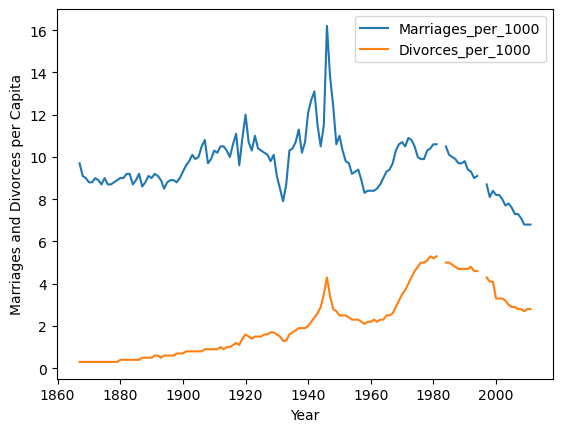

In [70]:
import matplotlib.pyplot as plt

# Assuming 'marriages_divorces_df' is your DataFrame containing the data

# Plot the data
marriages_divorces_df.plot(x='Year', y=['Marriages_per_1000', 'Divorces_per_1000'])

# Set plot title
# plt.title('Number of Marriages and Divorces per capita in the U.S. between 1867 and 2011')

# Set axis labels
plt.ylabel('Marriages and Divorces per Capita')

# Show the plot
plt.show()


## QUESTION 7

In [71]:
filterd = marriages_divorces_df.loc[marriages_divorces_df.Year.isin([1900,1950,2000]),['Year','Marriages_per_1000','Divorces_per_1000']]
filterd

,Year,Marriages_per_1000,Divorces_per_1000
33,1900,9.3,0.7
83,1950,11.0,2.5
133,2000,8.2,3.3


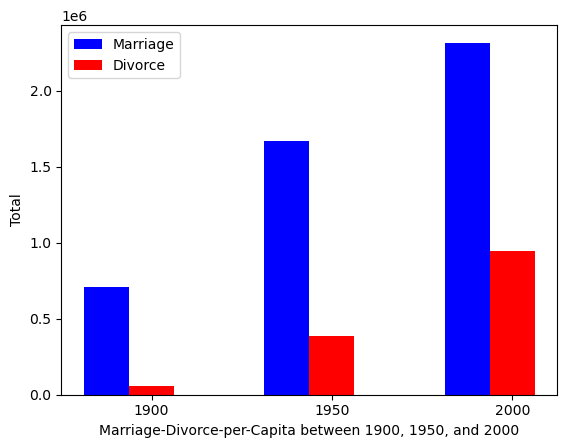

In [72]:
# Extract the data for the years 1900, 1950, and 2000
marriage = [709000, 1667000, 2315000]
divorce = [56000, 385000, 944000]

X = np.arange(len(marriage))
plt.bar(X, marriage, color = 'blue', width = 0.25)
plt.bar(X + 0.25, divorce, color = 'red', width = 0.25)
plt.legend(['Marriage', 'Divorce'])
plt.xticks([i + 0.25 for i in range(3)], ['1900', '1950', '2000'])
#plt.title('Comparison of Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.xlabel('Marriage-Divorce-per-Capita between 1900, 1950, and 2000')
plt.ylabel('Total')
#show the plot
plt.show()

## QUESTION 8

In [73]:
#import dependencies
import numpy as np
import pandas as pd
import plotly.graph_objects as go


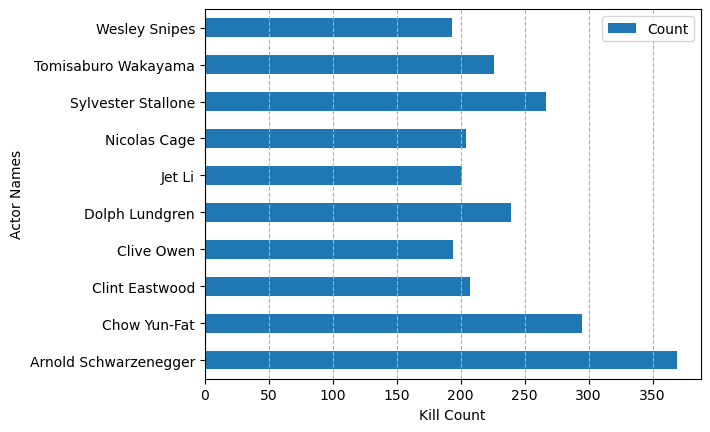

In [74]:
# The path to our CSV file
file = "actor_kill_counts.csv"

# Read our Crowdfunding data into pandas
actors_df = pd.read_csv(file)
actors_df.head()

# plot data as horizontal bar graph
actors_df.plot.barh(x='Actor', y='Count')

# set axis labels
plt.ylabel('Actor Names')
plt.xlabel('Kill Count')
plt.title=("Deadliest actors in Hollywood")

# show vertical grid lines (optional)
plt.grid(axis='x', linestyle = '--')

# show the plot
plt.show()

## QUESTION 9

In [75]:
# import dependencies
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [76]:
# The path to our CSV file
file = "roman-emperor-reigns.csv"

# Read our Crowdfunding data into pandas
emperor_reigns = pd.read_csv(file)
emperor_reigns

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


TypeError: 'str' object is not callable

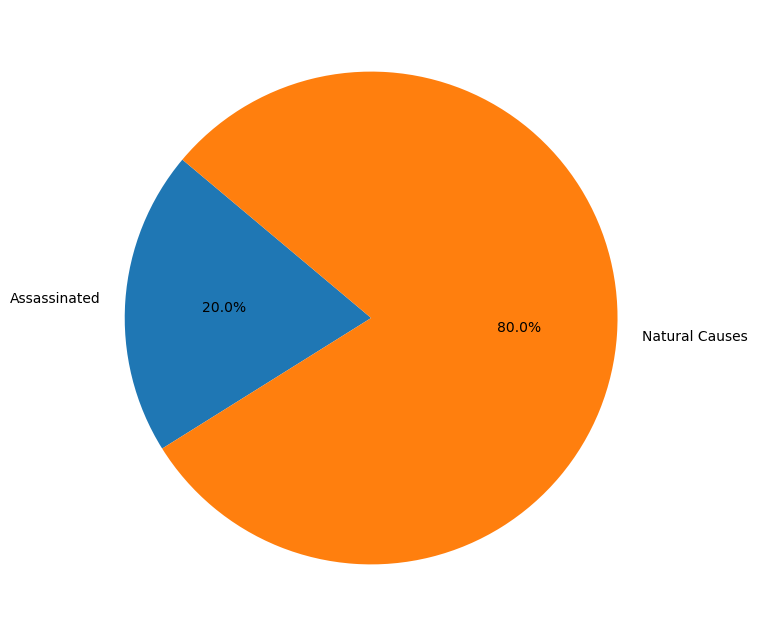

In [99]:
total_emperors = 100
assassinated_emperors = 20

# Calculate fraction of assassinated emperors
fraction_assassinated = assassinated_emperors / total_emperors

# Calculate fraction of emperors who died naturally
fraction_natural_death = 1 - fraction_assassinated

# Pie chart data
sizes = [fraction_assassinated, fraction_natural_death]
labels = ['Assassinated', 'Natural Causes']
assassinated_emperors = emperor_reigns[

# Create the pie chart
plt.figure(figsize=(8, 8)),
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140),
emperor_reigns['Cause_of_Death'].apply(lambda x: 'assassinated' in x.lower())]
plt.title("Fraction of RomanEmperor who were Assassinated")
plt.axis('equal')
plt.show()




30
38


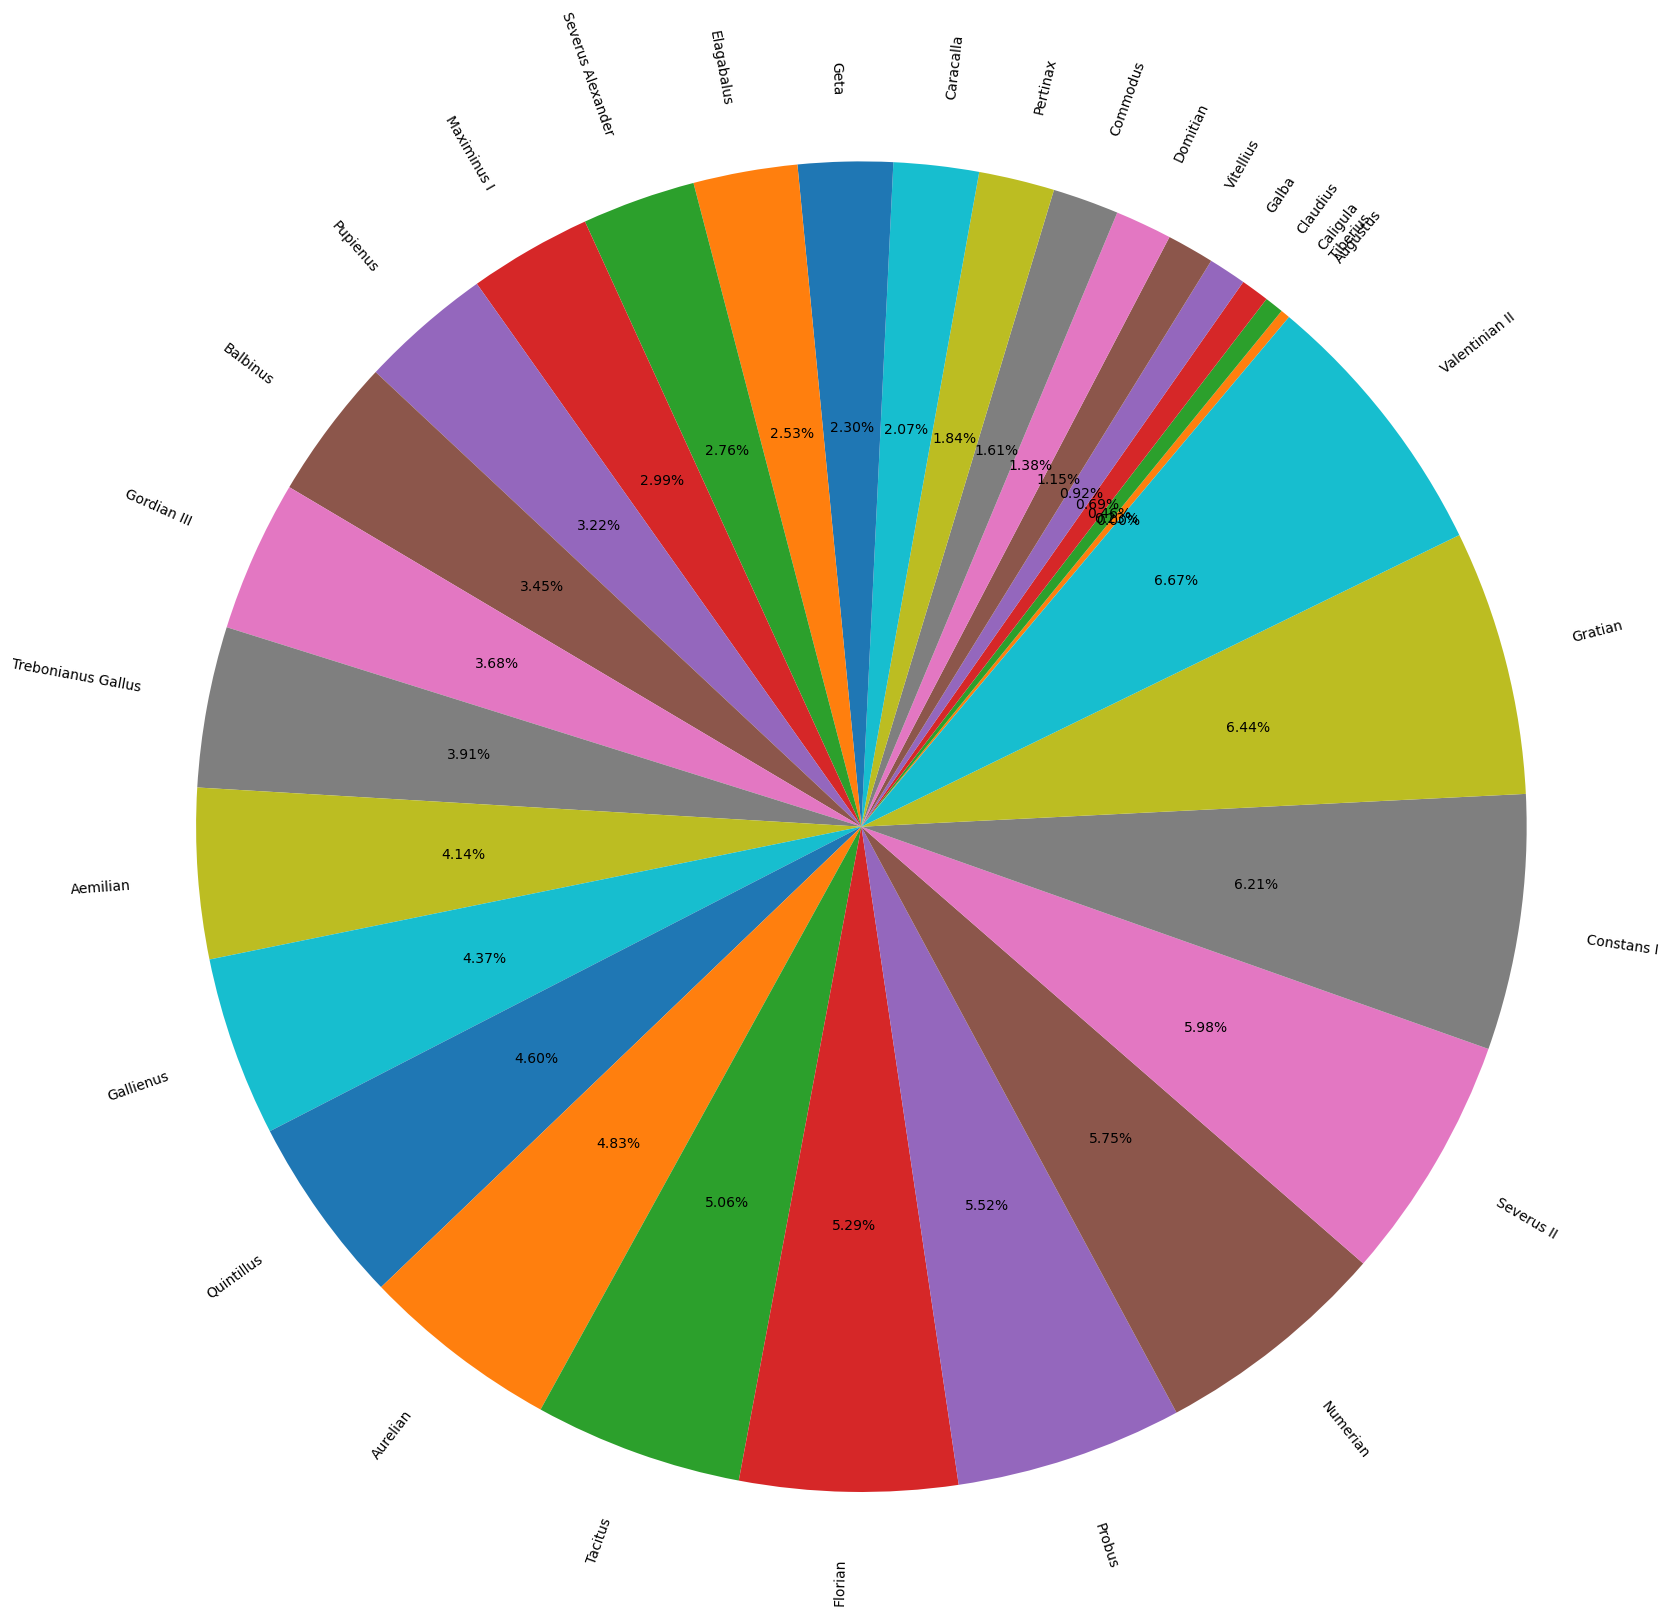

<Figure size 1500x2000 with 0 Axes>

In [101]:
#showing the fraction of all Roman Emperors that were assassinated.
assassinated_emperors = emperor_reigns[
emperor_reigns['Cause_of_Death'].apply(lambda x: 'assassinated' in x.lower())]

#print(assassinated_emperors)
number_assassinated = len(assassinated_emperors)
print(number_assassinated)
other_deaths = len(emperor_reigns) - number_assassinated
print(other_deaths)
emperor = assassinated_emperors["Emperor"]
cause_of_death = assassinated_emperors["Cause_of_Death"]
plt.pie(range(len(cause_of_death)), labels=emperor,autopct='%1.2f%%', startangle=50, radius=0.045 * 100,rotatelabels = 270)
fig = plt.figure(figsize=[15, 20])

In [ ]:
#pie chart showing the fraction of all Roman Emperors that were assassinated.
emperor_reigns= emperor_reigns[emperor_reigns["Cause_of_Death"]=="Assassinated"]
fig = px.pie(emperor_reigns, values=emperor_reigns.Length_of_Reign, names=emperor_reigns.Emperor)

fig.show()

## QUESTION 10

In [ ]:
#scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009
file = 'arcade-revenue-vs-cs-doctorates.csv'
df = pd.read_csv(file)
df.rename(columns = {'Total Arcade Revenue (billions)':'REVENUE','Computer Science Doctorates Awarded (US)':'AWARDS'}, inplace=True)
groups = df.groupby('Year')
for name, group in groups:
    plt.plot(group.REVENUE, group.AWARDS, marker='o', linestyle='', markersize=12, label=name)

plt.legend()
plt.xlabel("Total revenue earned by Arcades")
plt.ylabel("Computer Science Awards")

# show the scatter plot
plt.show()